In [40]:
import pandas as pd
from matplotlib import pyplot

In [41]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\BankNote_Authentication.csv")

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.shape

(1372, 5)

In [5]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


array([[<AxesSubplot:title={'center':'variance'}>,
        <AxesSubplot:title={'center':'skewness'}>],
       [<AxesSubplot:title={'center':'curtosis'}>,
        <AxesSubplot:title={'center':'entropy'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>]],
      dtype=object)

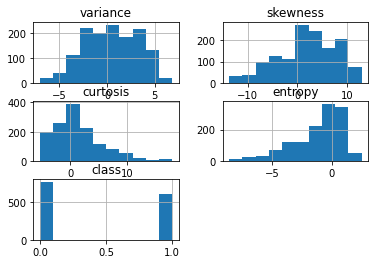

In [6]:
df.hist()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import LabelEncoder
from sklearn.metrics import accuracy_score

In [43]:
X, y = df.values[:,:-1], df.values[:,-1]

In [44]:
X=X.astype("float32")
y=LabelEncoder().fit_transform(y)

In [45]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [47]:
model = keras.Sequential([
    layers.Dense(10, activation = "relu", kernel_initializer = "he_normal", input_shape=[4]),
    layers.Dense(1, activation = "sigmoid")
])

In [48]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics=["acc"])

In [49]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test, y_test))

In [50]:
yhat=model.predict_classes(X_test)

In [67]:
score_train=accuracy_score(y_train, model.predict_classes(X_train))
print("Training Accuracy %.3f" % score_train)

Training Accuracy 0.998


In [68]:
score= accuracy_score(y_test, yhat)
print("Test Accuracy %.3f" % score)

Test Accuracy 0.989


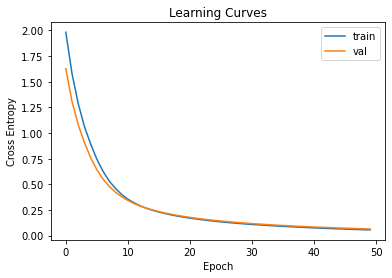

In [52]:
pyplot.title("Learning Curves")
pyplot.xlabel("Epoch")
pyplot.ylabel("Cross Entropy")
pyplot.plot(history.history["loss"], label="Training")
pyplot.plot(history.history["val_loss"], label="Validation")
pyplot.legend()
pyplot.show()

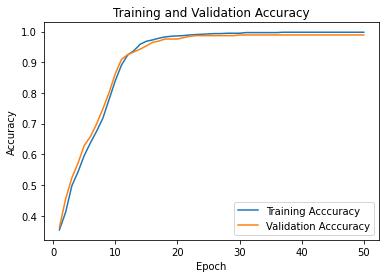

In [53]:
pyplot.title("Training and Validation Accuracy")
pyplot.xlabel("Epoch")
pyplot.ylabel("Accuracy")
loss_train=history.history["acc"]
loss_val= history.history["val_acc"]
epochs= range(1,51)
pyplot.plot(epochs, loss_train, label="Training Acccuracy")
pyplot.plot(epochs, loss_val, label="Validation Acccuracy")
pyplot.legend()
pyplot.show()

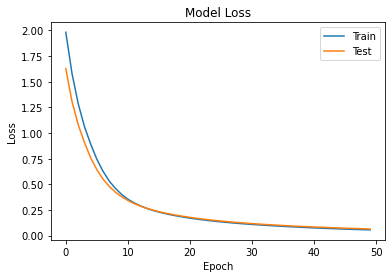

In [63]:
pyplot.title("Model Loss")
pyplot.xlabel("Epoch")
pyplot.ylabel("Loss")
pyplot.plot(history.history["loss"])
pyplot.plot(history.history["val_loss"])
pyplot.legend(["Train", "Test"])
pyplot.show()

In [55]:
yhat_probs= model.predict(X_test, verbose =0)
yhat_classes= model.predict_classes(X_test, verbose =0)

In [56]:
yhat_probs= yhat_probs[:,0]
yhat_classes= yhat_classes[:,0]

In [59]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [62]:
accuracy= accuracy_score(y_test, yhat_classes)
print("Accuracy: %f" % accuracy)
precision= precision_score(y_test, yhat_classes)
print("Precision: %f" % precision)
recall= recall_score(y_test, yhat_classes)
print("Recall: %f" % recall)
f1= f1_score(y_test, yhat_classes)
print("f1: %f" % f1)

Accuracy: 0.988962
Precision: 0.975369
Recall: 1.000000
f1: 0.987531
